Plot climate_var data over Germany. 

In [32]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.util as cutil
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from netCDF4 import Dataset

Set spatial and temporal extend.

In [33]:
timesteps = 60
# these cover the whole world: 
# 721, 1440
start_lon = 0
end_lon = 1440
start_lat = 0
end_lat = 721
# initially used by nina:
# start_lon = 370
#end_lon = 392
# start_lat = 67
# end_lat = 88

# filename = "./Users/ninaeffenberger/phd/2022-03-WpGermany/code/wp-germany/data/raw_data/CMIP6/german_area_7080/canesm5_r1i1p1f1_w5e5_ssp585_sfcwind_lat45.0to57.0lon5.0to16.0_daily_2071_2080.nc"
# filename = "./windspeed/sfcWind_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_20050716-20100716_v20200624.nc"
filename = r"C:\Users\maxrh\Desktop\map-py-nu\windspeeds\adaptor.mars.internal-1679233700.9700336-17718-14-a1e3929e-7e28-4cde-9223-125e2095db86.nc"




Load .nc-file and save the relevant variables. This makes rendering much faster when the nc-file is large. In this example, you can skip this part and continue with the next cell which load the pickle files. 

In [34]:

data = Dataset(filename)
print(data.variables["time"])
climate_var = data.variables["u10"][:]
climate_var = climate_var[0:timesteps, start_lat:end_lat,start_lon:end_lon].flatten()

# print(data.variables["lat_bnds"])
# print(data.variables["lon_bnds"])

# Germany is lon: 6:16, 146:156
lons, lats = np.meshgrid(
    data.variables["longitude"][start_lon:end_lon], data.variables["latitude"][:][start_lat:end_lat]
)
pd.DataFrame(lons).to_pickle(
    "./dummy_data/lons"
)
pd.DataFrame(lats).to_pickle(
    "./dummy_data/lats"
)
pd.DataFrame(climate_var).to_pickle(
    "./dummy_data/climate_var"
)

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (60,)
filling on, default _FillValue of -2147483647 used


Load the pickle-files. 

In [35]:
lons = np.load("dummy_data/lons", allow_pickle=True)
lats = np.load("dummy_data/lats", allow_pickle=True)
clim_var = np.load("dummy_data/climate_var", allow_pickle=True)
climate_var = np.array(clim_var).reshape(timesteps,end_lat - start_lat,end_lon - start_lon )

print(climate_var)

[[[-0.09403323 -0.09403323 -0.09403323 ... -0.09403323 -0.09403323
   -0.09403323]
  [-2.70705316 -2.71000073 -2.7129483  ... -2.69280658 -2.69722793
   -2.70214055]
  [-2.88046847 -2.88538109 -2.89078497 ... -2.85688792 -2.86622189
   -2.87408208]
  ...
  [-3.01556539 -3.0052489  -2.98903727 ... -3.05191874 -3.03668963
   -3.0244081 ]
  [-2.54395435 -2.53363785 -2.52332136 ... -2.56802616 -2.56016598
   -2.55230579]
  [ 0.34515455  0.34515455  0.34515455 ...  0.34515455  0.34515455
    0.34515455]]

 [[-0.08371674 -0.08371674 -0.08371674 ... -0.08371674 -0.08371674
   -0.08371674]
  [-3.06321775 -3.05683135 -3.05093622 ... -3.07648181 -3.07206046
   -3.06763911]
  [-3.01605665 -3.00967025 -2.99984502 ... -3.03865468 -3.02981197
   -3.02244305]
  ...
  [-4.25157933 -4.24126284 -4.22554247 ... -4.28400259 -4.27024726
   -4.25943951]
  [-3.77259936 -3.76228287 -3.75196638 ... -3.79372361 -3.78684595
   -3.77947702]
  [ 0.52986887  0.52986887  0.52986887 ...  0.52986887  0.52986887
    0.

Generate the plot. 

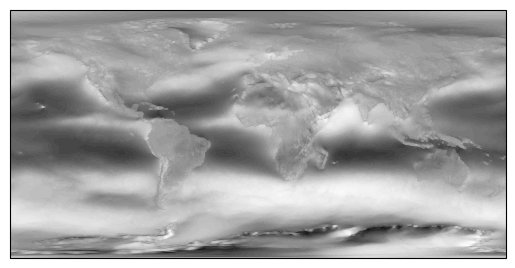

KeyboardInterrupt: 

In [37]:
%matplotlib inline
from IPython.display import display, clear_output

cmap = mpl.colormaps["Greys_r"]

for i in np.arange(0, timesteps):
    # set the axes' spatial projection, styling, and title
    print("processing frame {} of {}".format(i+1, timesteps))
    ax = plt.axes(projection=ccrs.PlateCarree())
    # ax.coastlines()
    # generate the contour map

    plt.contourf(
        lons,
        lats,
        climate_var[i],
        60,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )

    plt.savefig("./output/u_frame_{}.jpg".format(i), dpi=1200)
    # ax.add_feature(cf.BORDERS, edgecolor="black")
    clear_output(wait = True)
    plt.pause(0.001)

